In [2]:
#load libraries
import pandas as pd # data manipulation
import numpy as np # Math operation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import torch # learning
import kagglehub # to get data from kaggle
import shutil
import os

In [6]:
#download dataset
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

100%|██████████| 586M/586M [01:51<00:00, 5.51MB/s] 

Extracting files...


Path to dataset files: C:\Users\tajvi\.cache\kagglehub\datasets\alessiocorrado99\animals10\versions\2


In [33]:
#load dataset
from collections import defaultdict

# Define the path to the dataset
dataset_path = '../data/animals_dataset/raw-img/'



# Understanding the Dataset

In [ ]:
# [[Get number of classes]]

# Get the list of subdirectories (ie cclasses)
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Get the number of classes
num_classes = len(classes)

# Print the number of classes
print(f"Number of classes: {num_classes}")

# Optionally, print the class names
print("Classes:", classes)

Number of classes: 10
Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [8]:
# [[Get image count]]

# Initialize variables
class_image_counts = {}
total_image_count = 0

# Iterate through each class folder
for class_folder in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_folder)
    
    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Count the number of images in the class folder
        num_images = len([img for img in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, img))])
        class_image_counts[class_folder] = num_images
        total_image_count += num_images

# Print the total image count
print(f"Total number of images: {total_image_count}")

# Print the image count per class
print("Image count per class:")
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count} images")

Total number of images: 26179
Image count per class:
cane: 4863 images
cavallo: 2623 images
elefante: 1446 images
farfalla: 2112 images
gallina: 3098 images
gatto: 1668 images
mucca: 1866 images
pecora: 1820 images
ragno: 4821 images
scoiattolo: 1862 images


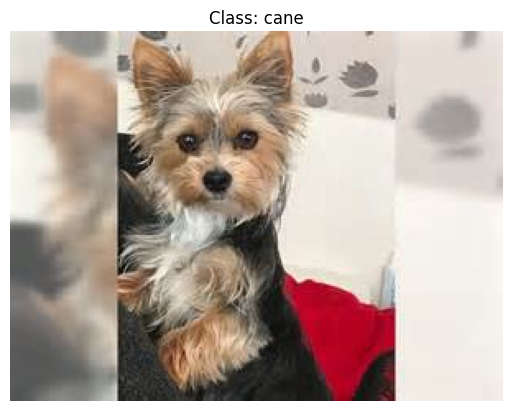

In [ ]:
# [[Loading image examle]]
from PIL import Image

# Define the path to the dataset
#dataset_path = './data/animals_dataset/raw-img/'

# Select a class (e.g., the first class in the directory)
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
selected_class = classes[0]  # class 0 = Cane (dog)

# Path to the selected class folder
class_folder_path = os.path.join(dataset_path, selected_class)

# Get the first image in the class folder
image_files = [img for img in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, img))]
selected_image_path = os.path.join(class_folder_path, image_files[0])

# Load the image
image = Image.open(selected_image_path)

# Display the image inline in the notebook
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.title(f"Class: {selected_class}")
plt.show()

In [ ]:

from collections import Counter

# # Define the path to the dataset
# dataset_path = './data/animals_dataset/raw-img/'

# Initialize variables
image_dimensions = []
image_formats = []

# Iterate through each class folder
for class_folder in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_folder)
    
    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Get the first image in the class folder
        image_files = [img for img in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, img))][:1]
        
        for img_file in image_files:
            img_path = os.path.join(class_folder_path, img_file)
            try:
                # Open the image
                with Image.open(img_path) as img:
                    # Append the image dimensions (width, height)
                    image_dimensions.append(img.size)
                    
                    # Append the image format (e.g., JPEG, PNG)
                    image_formats.append(img.format)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

# Calculate the format distribution
format_distribution = Counter(image_formats)

# Print the image dimensions and format distribution
print("Image format distribution:")
for fmt, count in format_distribution.items():
    print(f"{fmt}: {count}")

print("\nSample image dimensions (width, height):")
print(image_dimensions)


# -- NOTE -- 
# - Dataset contains images of varying dimensions and formats.
# - May need to resize or standardize images before feeding the model

Image format distribution:
JPEG: 10

Sample image dimensions (width, height):
[(300, 225), (300, 225), (640, 426), (426, 640), (291, 300), (300, 210), (300, 200), (640, 480), (640, 401), (200, 300)]


# Class Distribution Analysis

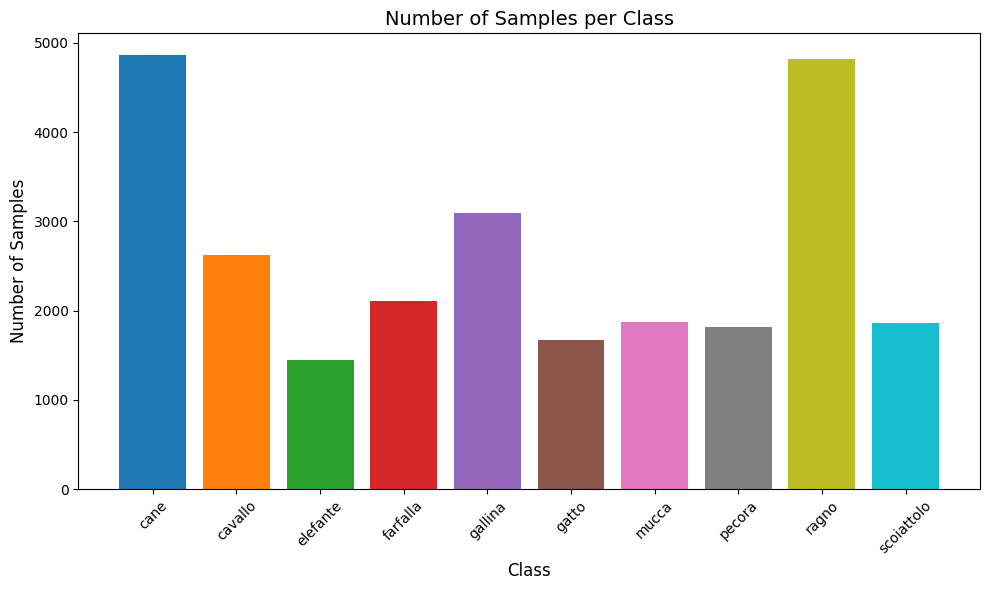

In [ ]:
# [[Bar Chat showing samples per class]]

# Initialize a dictionary to store the image count per class
class_image_counts = {}

# Iterate through each class folder
for class_folder in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_folder)
    
    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Count the number of images in the class folder
        num_images = len([img for img in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, img))])
        class_image_counts[class_folder] = num_images

# Create a bar chart with classes
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(class_image_counts)))  #olormap to generate unique colors
plt.bar(class_image_counts.keys(), class_image_counts.values(), color=colors)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Number of Samples per Class', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
# [[Calculate Imbalance Ratio]]

max_samples = max(class_image_counts.values())
min_samples = min(class_image_counts.values())
imbalance_ratio = max_samples / min_samples

print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 3.36


In [29]:
# [[over/under representation]]

# Define thresholds for over-rep and under-rep
threshold_over = 0.8 * max_samples  # Classes with samples close to the max
threshold_under = 1.2 * min_samples  # Classes with samples close to the min

# Identify over-represented classes
over_represented = [cls for cls, count in class_image_counts.items() if count >= threshold_over]

# Identify under-represented classes
under_represented = [cls for cls, count in class_image_counts.items() if count <= threshold_under]

print("Over-Represented Classes:", over_represented)
print("Under-Represented Classes:", under_represented)

Over-Represented Classes: ['cane', 'ragno']
Under-Represented Classes: ['elefante', 'gatto']


In [ ]:
# Analyze the impact of imbalance on overtraining
if imbalance_ratio > 2:
    print("Warning: Significant class imbalance detected")
else:
    print("Class distribution is  balanced")

# Visual Complexity Analysis

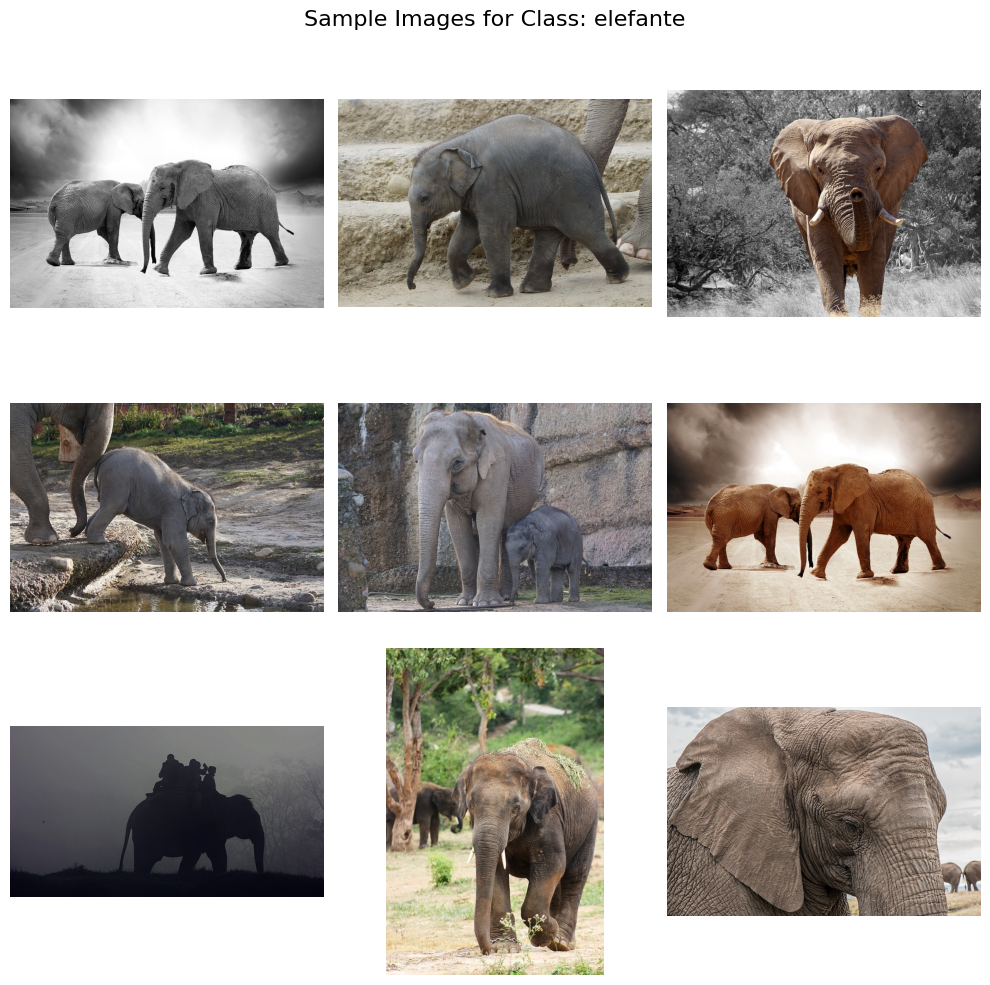

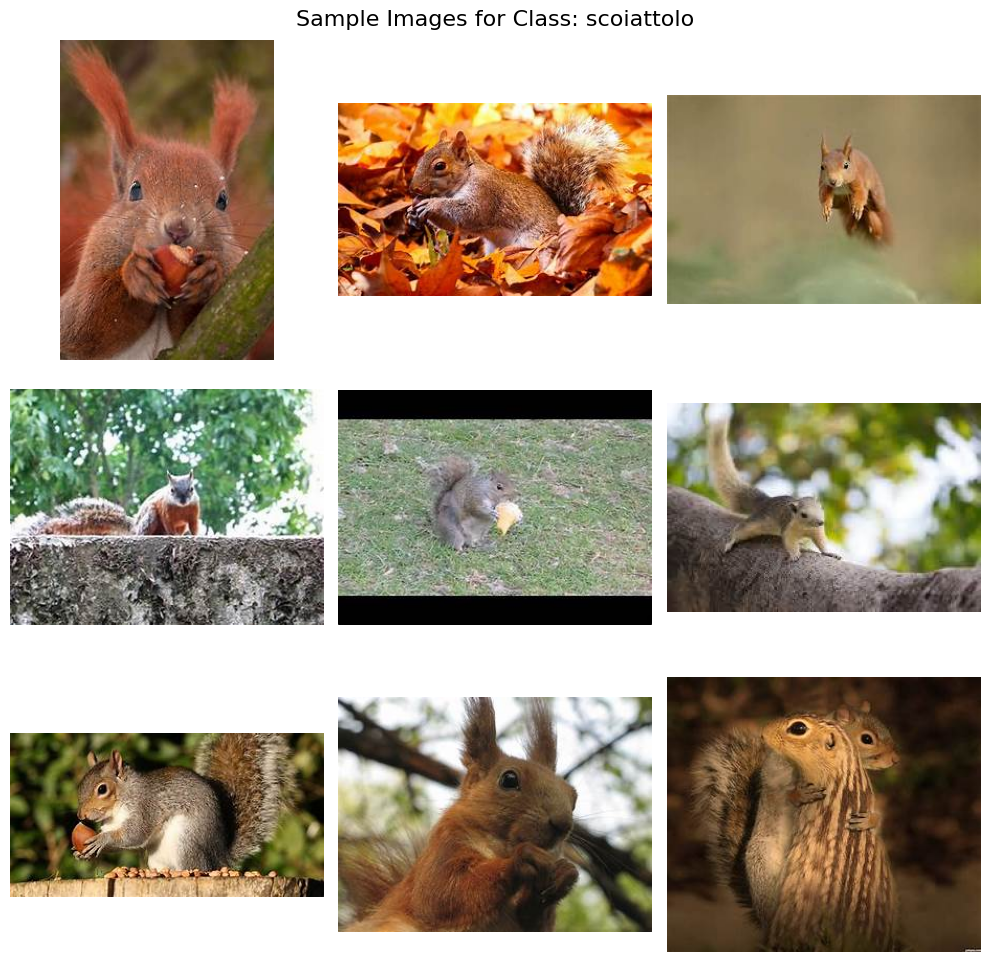

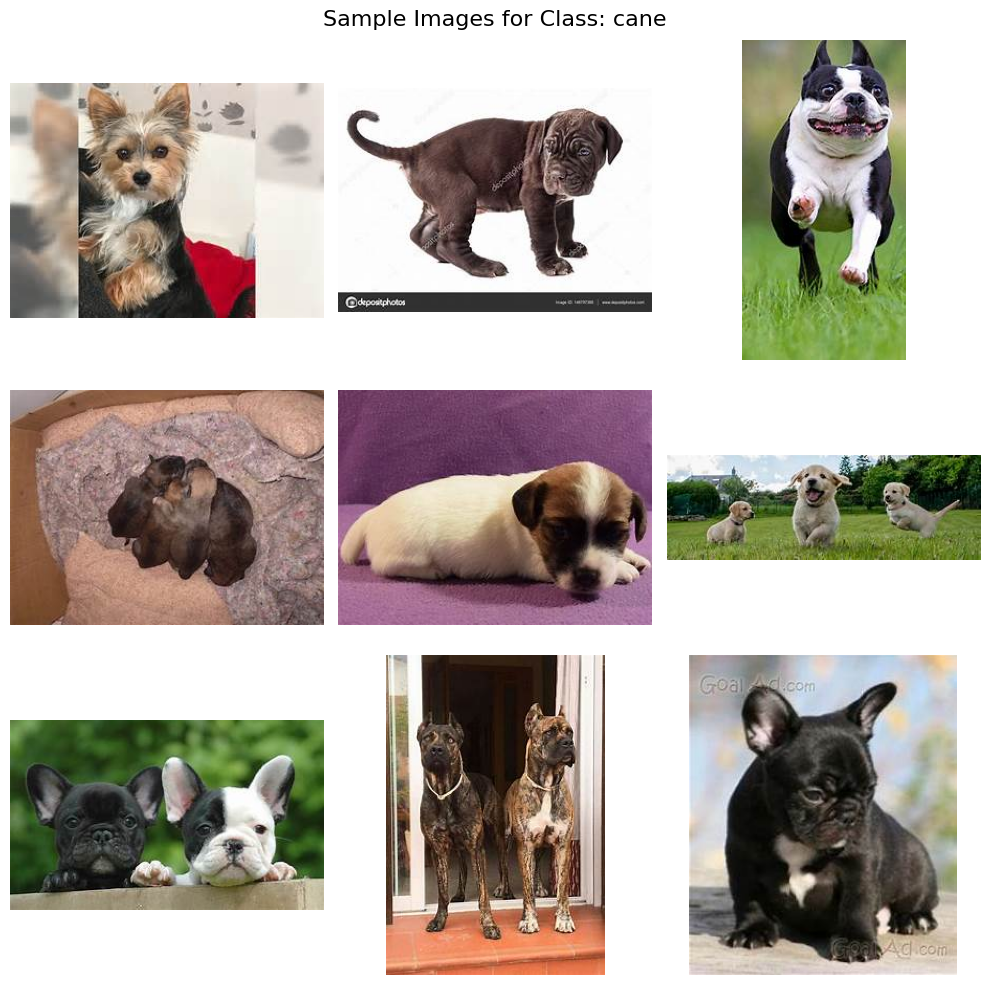

In [35]:
from PIL import Image

# [[Display images in a grid]]


# classes by difficulty:
# - High distinctiveness: elephant, butterfly, spider (unique shapes)
# - Medium distinctiveness: chicken, sheep, cow, horse, squirrel
# - Low distinctiveness: dog, cat (commonly confused)

# Function to display a grid of sample images for a class
def display_sample_images(class_name, num_images=9):
    class_folder_path = os.path.join(dataset_path, class_name)
    image_files = [img for img in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, img))][:num_images]
    
    plt.figure(figsize=(10, 10))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_folder_path, img_file)
        try:
            image = Image.open(img_path)
            plt.subplot(3, 3, i + 1)
            plt.imshow(image)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    plt.suptitle(f"Sample Images for Class: {class_name}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Example: Display images for a high distinctiveness class
display_sample_images('elefante')

# Example: Display images for a medium distinctiveness class
display_sample_images('scoiattolo')

# Example: Display images for a low distinctiveness class
display_sample_images('cane')

Notes:
- moderate background noise in photos
- lots of variations between posing,colors,and shape within each class
- Image quality and dimension varies, but nothing blurry or out of focus 

# Similarity Matrix Analysis

In [ ]:
# [[Define confusion pairs]]
confusion_pairs = [
    ("cane", "gatto"),  # Similar size, common pets
    ("cavallo", "mucca"),  # Similar body structure
    ("ragno", "farfalla")  # Small, unclear, multiple legs/wings
]

print("Likely Confusion Pairs:")
for pair in confusion_pairs:
    print(f"{pair[0]} vs. {pair[1]}")

Likely Confusion Pairs:
cane vs. gatto
cavallo vs. mucca
ragno vs. farfalla


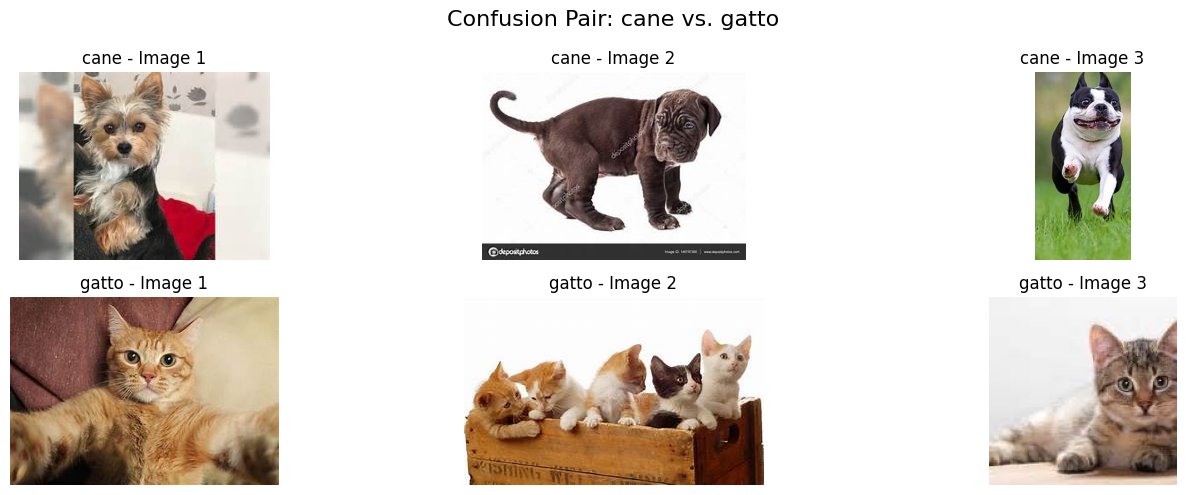

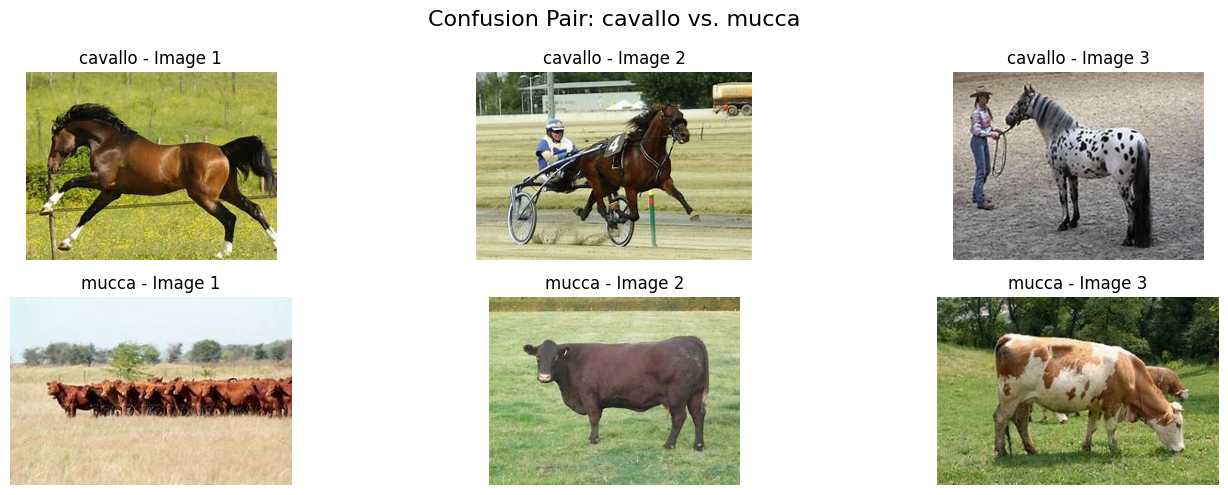

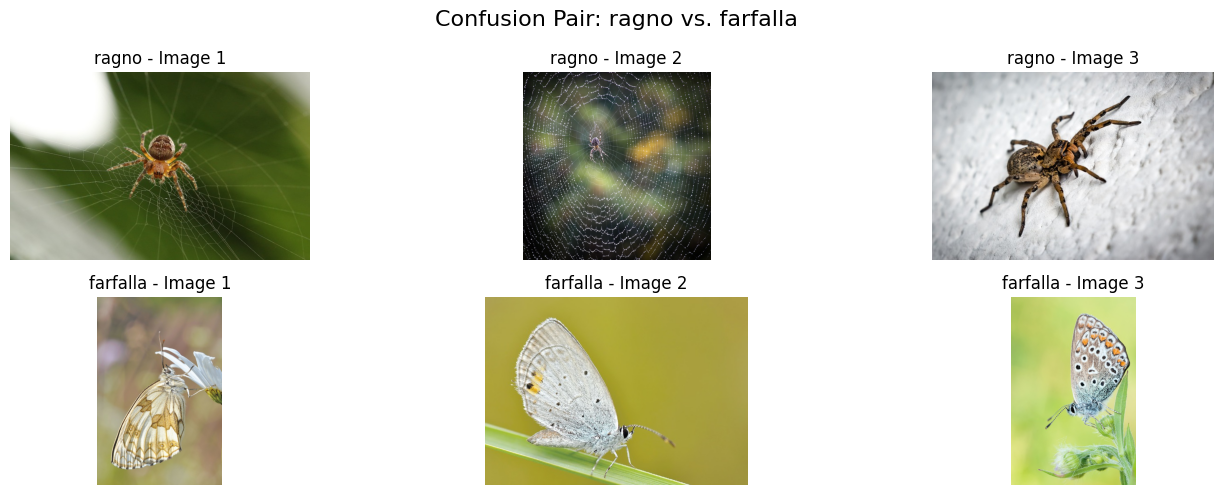

In [ ]:
from PIL import Image

#[[Visualize confusion pairs]]

# Function to display sample images for a confusion pair
def display_confusion_pair(pair, num_images=3):
    class1, class2 = pair
    class1_folder = os.path.join(dataset_path, class1)
    class2_folder = os.path.join(dataset_path, class2)
    
    class1_images = [img for img in os.listdir(class1_folder) if os.path.isfile(os.path.join(class1_folder, img))][:num_images]
    class2_images = [img for img in os.listdir(class2_folder) if os.path.isfile(os.path.join(class2_folder, img))][:num_images]
    
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(class1_images):
        img_path = os.path.join(class1_folder, img_file)
        try:
            image = Image.open(img_path)
            plt.subplot(2, num_images, i + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"{class1} - Image {i+1}")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    for i, img_file in enumerate(class2_images):
        img_path = os.path.join(class2_folder, img_file)
        try:
            image = Image.open(img_path)
            plt.subplot(2, num_images, num_images + i + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"{class2} - Image {i+1}")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    plt.suptitle(f"Confusion Pair: {class1} vs. {class2}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Example: Display confusion pairs
for pair in confusion_pairs:
    display_confusion_pair(pair)

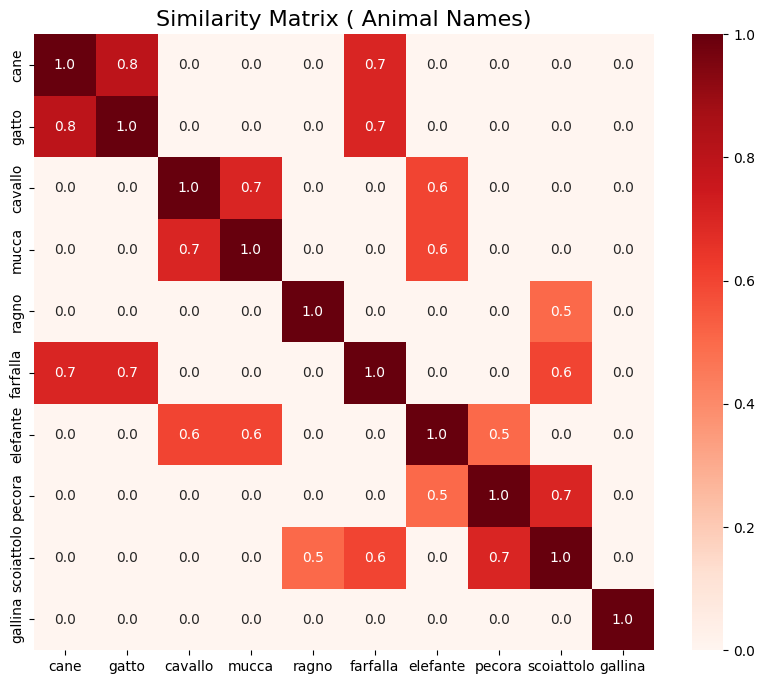

In [39]:

# [[Similarity Matrix Analysis]]

# Visual Similarity between classes (hypothetical values)
similarity_data = {
    "cane": [1, 0.8, 0, 0, 0, 0.7, 0, 0, 0, 0],
    "gatto": [0.8, 1, 0, 0, 0, 0.7, 0, 0, 0, 0],
    "cavallo": [0, 0, 1, 0.7, 0, 0, 0.6, 0, 0, 0],
    "mucca": [0, 0, 0.7, 1, 0, 0, 0.6, 0, 0, 0],
    "ragno": [0, 0, 0, 0, 1, 0, 0, 0, 0.5, 0],
    "farfalla": [0.7, 0.7, 0, 0, 0, 1, 0, 0, 0.6, 0],
    "elefante": [0, 0, 0.6, 0.6, 0, 0, 1, 0.5, 0, 0],
    "pecora": [0, 0, 0, 0, 0, 0, 0.5, 1, 0.7, 0],
    "scoiattolo": [0, 0, 0, 0, 0.5, 0.6, 0, 0.7, 1, 0],
    "gallina": [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
}

# Convert the dictionary to a DataFrame
similarity_matrix = pd.DataFrame(similarity_data, index=["cane", "gatto", "cavallo", "mucca", "ragno", "farfalla", "elefante", "pecora", "scoiattolo", "gallina"])

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="Reds", fmt=".1f")
plt.title("Similarity Matrix ( Animal Names)", fontsize=16)
plt.show()

In [8]:
#Understand the Dataset
# Handle Missing Values
# Visualize Data Distributions
# Analyze Relationships Between Variables